<a href="https://colab.research.google.com/github/Talizg03/weather/blob/main/31_1_25_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# conitnue from the last 30.1.25 with the best code..

<ipython-input-1-261d0e6877ab>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 3826.0374180259064
Root Mean Squared Error (RMSE) on Test Data: 10200.672636558835

Feature Importances (in %):
                     Feature  Importance
14               ProductSize   29.082359
5                   YearMade   24.003535
0                    SalesID    7.883778
11           fiSecondaryDesc    5.237582
8                   saledate    4.415363
10               fiBaseModel    4.234901
1                  MachineID    3.872245
15        fiProductClassDesc    3.580671
9                fiModelDesc    3.158297
16                     state    2.579505
4               auctioneerID    2.369797
2                    ModelID    1.596114
6   MachineHoursCurrentMeter    1.391455
20                 Enclosure    0.762027
31                Hydraulics    0.699173
38            Coupler_System    0.657629
36                 Tire_Size    0.615635
13         fiModelDescriptor    0.376777
33                    Ripper    0.359006
48                Blad

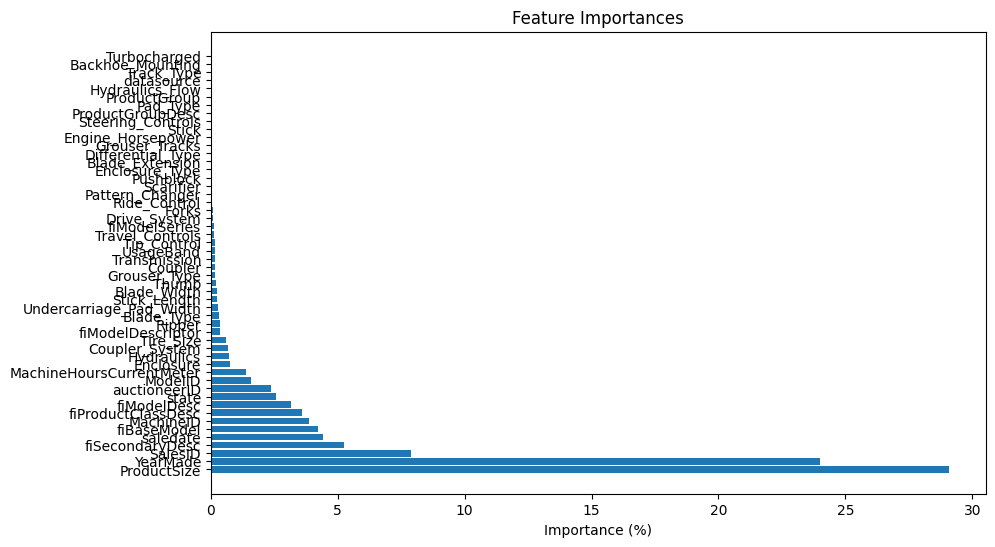

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")



# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X

# Step 2: Preprocessing (Assuming you have 'SalePrice' as the dependent variable)
# Split data into features (X) and target (y)
X = df.drop(columns=['SalePrice'] )  # Adjust the columns to drop based on your dataset
y = df['SalePrice']

# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()


<ipython-input-2-c88953bd4f2a>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 3547.9676170253656
Root Mean Squared Error (RMSE) on Test Data: 9475.836625517117

Feature Importances (in %):
                     Feature  Importance
5                   YearMade   23.855873
14               ProductSize   22.580857
0                    SalesID    9.066437
10               fiBaseModel    8.792996
11           fiSecondaryDesc    7.572043
15        fiProductClassDesc    5.476704
8                   saledate    4.185540
1                  MachineID    4.058494
2                    ModelID    3.845713
9                fiModelDesc    2.703016
16                     state    2.499697
4               auctioneerID    1.973845
6   MachineHoursCurrentMeter    1.298692
12             fiModelSeries    0.570932
13         fiModelDescriptor    0.528432
17              ProductGroup    0.257285
18          ProductGroupDesc    0.240742
7                  UsageBand    0.227821
19              Drive_System    0.163102
3                 datas

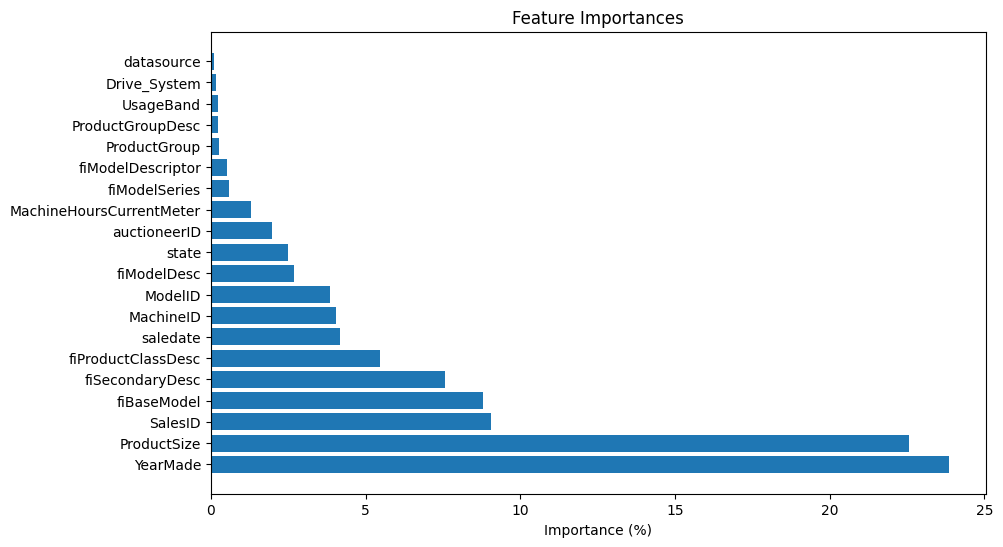

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")



# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X


# Drop the selected columns (including 'SalePrice')
X = df.drop(columns=['SalePrice'] + list(df.columns[21:53]))
y = df['SalePrice']
# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()


# adding Key Hyperparameters to RandomForestRegressor

<ipython-input-9-f0dc3fe2aea1>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 11146.234415619689
Root Mean Squared Error (RMSE) on Test Data: 11363.306833367848

Feature Importances (in %):
                     Feature  Importance
5                   YearMade   30.051958
14               ProductSize   29.940428
10               fiBaseModel   10.893575
11           fiSecondaryDesc    8.963697
15        fiProductClassDesc    6.146624
0                    SalesID    5.882087
2                    ModelID    3.272223
9                fiModelDesc    1.985127
1                  MachineID    0.741807
6   MachineHoursCurrentMeter    0.465019
12             fiModelSeries    0.433990
13         fiModelDescriptor    0.374812
4               auctioneerID    0.178803
17              ProductGroup    0.162603
18          ProductGroupDesc    0.160565
8                   saledate    0.132379
19              Drive_System    0.090381
16                     state    0.090118
3                 datasource    0.024730
7                  Usa

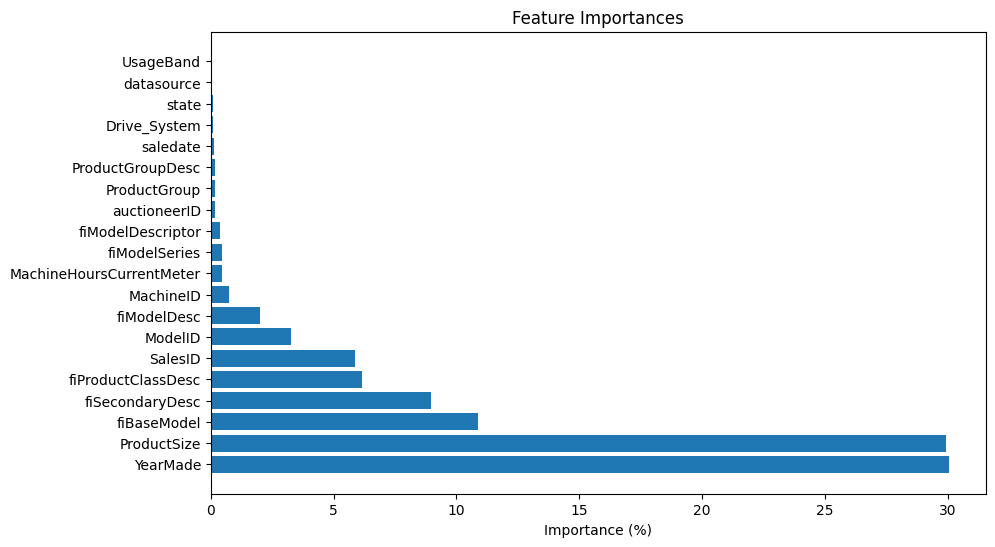

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")



# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X


# Drop the selected columns (including 'SalePrice')
X = df.drop(columns=['SalePrice'] + list(df.columns[21:53]))
y = df['SalePrice']
X = preprocess_data(X)
# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, min_samples_split=5,min_samples_leaf=4)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()


In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

df = pd.read_csv("Train.csv")
# Drop the selected columns (including 'SalePrice')

def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X


X = df.drop(columns=['SalePrice'] + list(df.columns[21:53]))
y = df['SalePrice']
# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(ra
y_test_pred = model.predict(X_test)
y_test_pred

<ipython-input-1-6eabfcbe69ba>:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


array([25500, 45000, 25000, ..., 20000, 34000,  8500])

In [2]:
y_test == y_test_pred # True predictions
print('Correct predictions:', (y_test == y_test_pred).sum(), f", {(y_test == y_test_pred).mean():.2%}")
print('Incorrect predictions:', (y_test != y_test_pred).sum(), f", {(y_test != y_test_pred).mean():.2%}")

Correct predictions: 1507 , 4.61%
Incorrect predictions: 31206 , 95.39%


In [ ]:
def calc_classification_metrics(y_test, y_test_pred):
    # Calculate TP, TN, FP, FN
    TP = ((y_test == 1) & (y_test_pred == 1)).sum()  # True Positives
    TN = ((y_test == 0) & (y_test_pred == 0)).sum()  # True Negatives
    FP = ((y_test == 0) & (y_test_pred == 1)).sum()  # False Positives
    FN = ((y_test == 1) & (y_test_pred == 0)).sum()  # False Negatives

    # Print the results
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")

    # Additional summary
    accuracy = (TP + TN) / len(y_test)
    print(f"Accuracy: {accuracy:.2%}")

    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

calc_classification_metrics(y_test, y_test_pred)

True Positives (TP): 0
True Negatives (TN): 0
False Positives (FP): 0
False Negatives (FN): 0
Accuracy: 0.00%
